# Домашнее задание  
## "Элементарные алгоритмы обработки временных рядов"


Взять с прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель.  
Так звучит домашнее задание.  
Поскольку мы уже определили какой ряд стационарный, какой нет. Возьмём за основу прошлое домашнее задание, выберем два графика и займёмся предсказаниями.

### Напомним содержание прошлой "серии" :)) :  
(...)

In [1]:
import pandas as pd

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

**Отобразим все графики и выберем два из них (стационарный и нестационарный).**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

##### Список ключей:

In [5]:
ask = list(all_series.keys())

**Сделаем копию нашего словаря с временными рядами и уменьшим количество графиков до двух - стационарного и нестационарного.**

In [6]:
import copy
all_series_MA = copy.copy(all_series)

In [7]:
i = [0, 1 , 4, 5]
for el in i:
    del all_series_MA[ask[el]]
all_series_MA.keys()

dict_keys(['International airline passengers: monthly totals in thousands', 'Mean monthly air temperature (Deg. F) Nottingham Castle'])

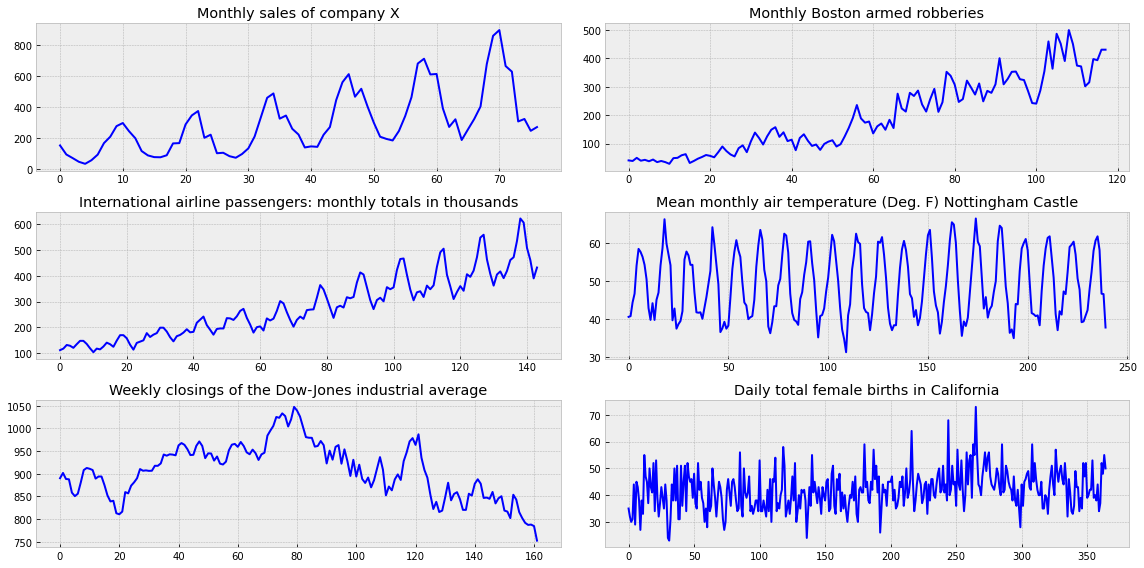

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Оставим два графика (стационарный и нестационарный) (ниже будет запущен тест Дики-Фуллера)

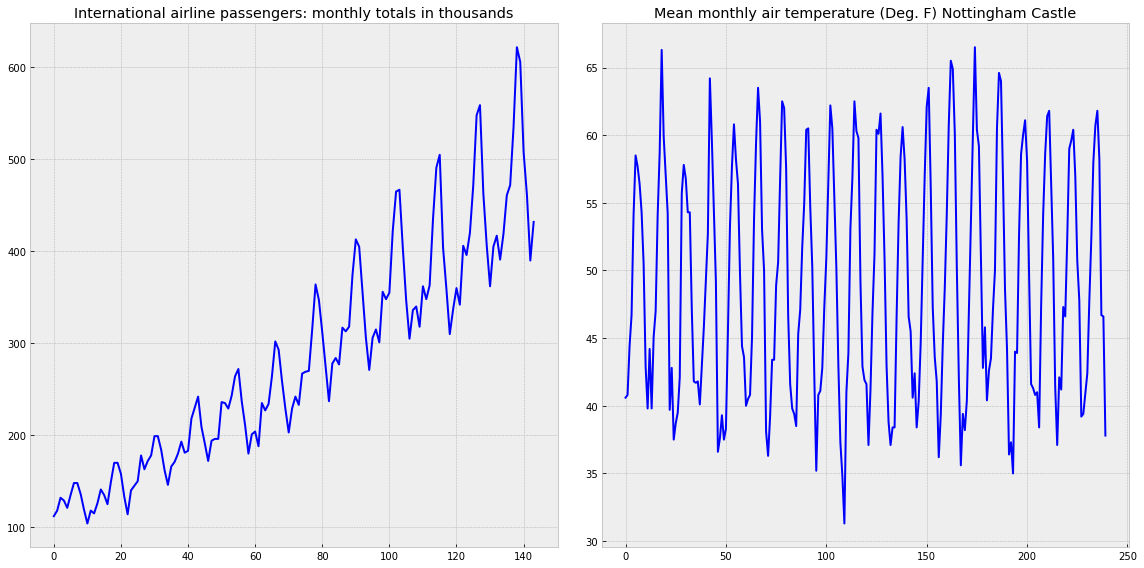

In [9]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (1, 2)
    for i, key in enumerate(all_series_MA.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series_MA[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Сезонность

В функцию, представленной на лекции добавил ещё один параметр ts_title, чтобы можно было отобразить название графика.

In [10]:
def plot_ts_and_points(ts, ts_title ,start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        
        ts_ax = plt.axes()
        ts_ax.set_title(ts_title)
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

Нарисуем графики с отображением **предполагаемой** сезонности:

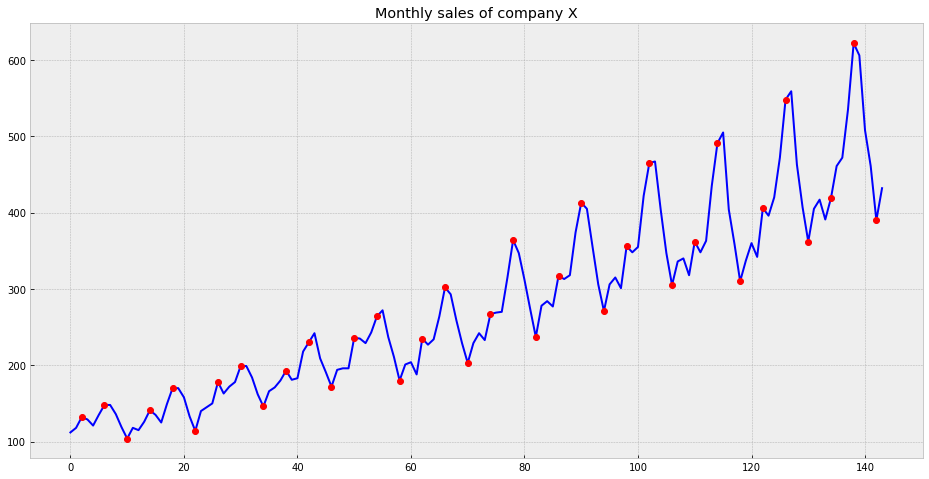

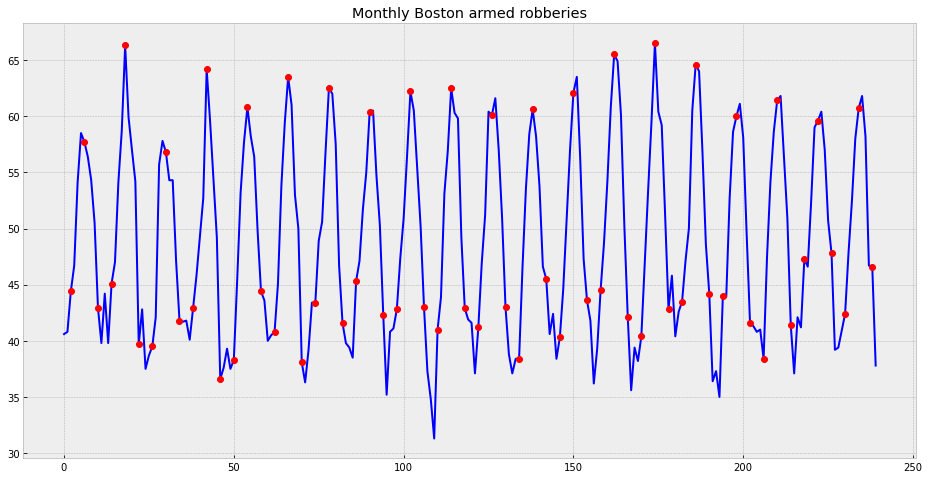

In [11]:
for i, key in enumerate(all_series_MA.keys()):
    plot_ts_and_points(all_series_MA[key], ask[i], 2, 4)

# Нормализуем дисперсию

Мы нормализуем дисперсию первоначально всех графиков серии, включая наши два графика. И проведём тест Дики-Фуллера на измененных данных. Возможно повторим ещё и дифференцирование. (Закрепляя материал прошлого домашнего задания) и после займёмся прогнозированием исходных графиков.

Нам понадобится преобразование Бокса-Кокса. Применим для наших двух временных рядов. И отобразим на графиках.

In [12]:
from scipy.stats import boxcox

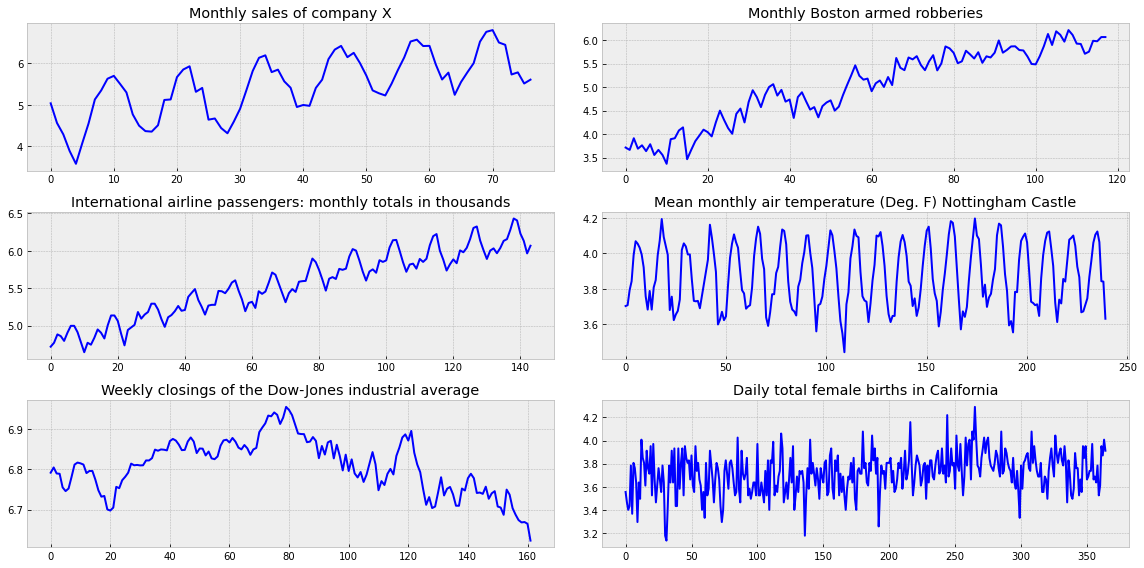

In [13]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        all_series[key] = boxcox(all_series[key], 0)
        ts_ax = plt.subplot2grid(layout, (y, x))
        plt.plot(all_series[key], color='blue')
        ts_ax.set_title(key)
    
    plt.tight_layout()

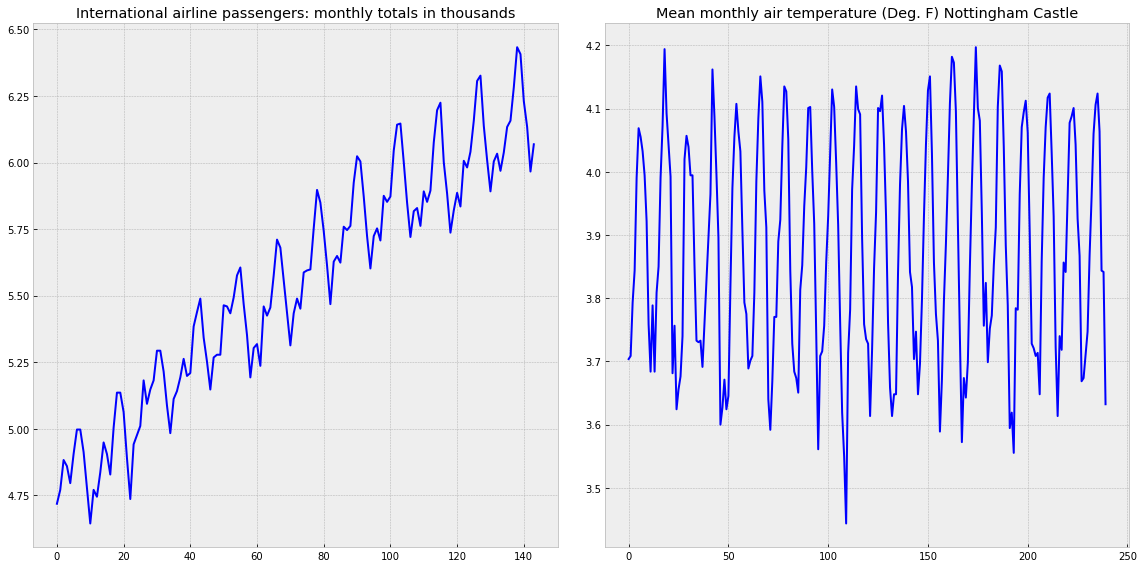

In [14]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (1, 2)
    for i, key in enumerate(all_series_MA.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        all_series_MA[key] = boxcox(all_series_MA[key], 0)
        ts_ax = plt.subplot2grid(layout, (y, x))
        plt.plot(all_series_MA[key], color='blue')
        ts_ax.set_title(key)
    
    plt.tight_layout()

# Тест Дики-Фуллера 

Проверим наши **два графика** на стационарность до применения преобразования Бокса-Кокса (исходную серию).

In [15]:
from statsmodels.tsa.stattools import adfuller

Также немного изменил функуцию, нам ведь важно по сути пока только p-value. Ввёл дополнительно ts_index переменную, в которую передаю строковое значение 'p-value'.

In [16]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries, ts_index):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(ts_index, f"{dfoutput[ts_index]:.2f}")

In [17]:
for key in all_series_MA.keys():
    print('-----',key,':')
    test_stationarity(all_series[key], 'p-value')

----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.42
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
p-value 0.00


Для двух временных рядов *'International airline passengers: monthly totals in thousands'* и *'Mean monthly air temperature (Deg. F) Nottingham Castle'* на исходных данных тест Дики-Фуллера показывает, что временной ряд *'International airline passengers: monthly totals in thousands'* - нестационарный, а временной ряд *'Mean monthly air temperature (Deg. F) Nottingham Castle'* - стационарный и не требует обработки для выявления тренда, сезонности, цикличности.

# Коррелограммы

Покажем коррелограммы исходной серии для наших двух графиков.

In [18]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

Передаём в функцию название графика с помощью переменной ts_title.

In [19]:
def tsplot(y, ts_title, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title(ts_title)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

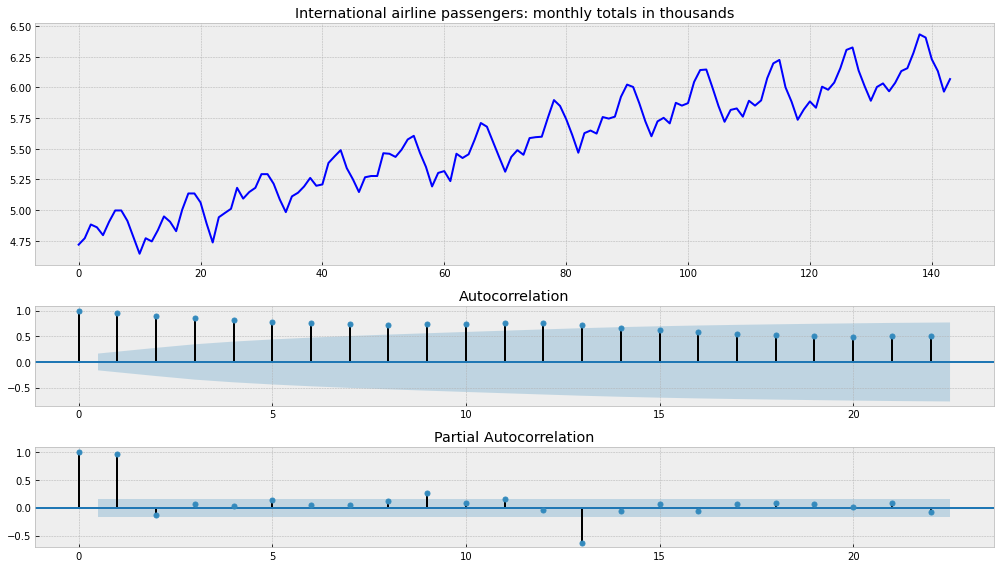

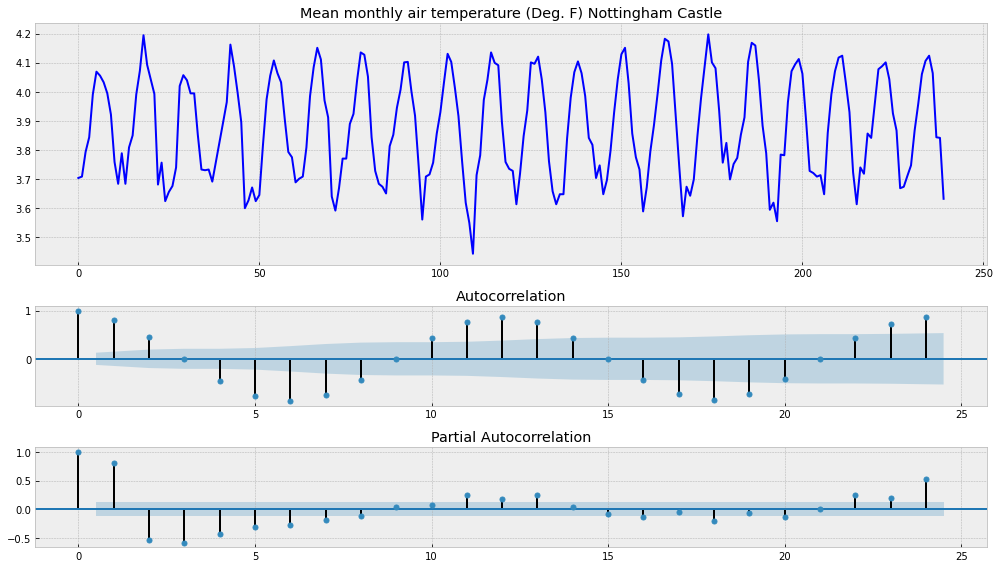

In [20]:
for i, key in enumerate(all_series_MA.keys()):
    tsplot(all_series_MA[key], key)

Для первого временного ряда из данных диаграмм видно явное желание продифференцировать и убрать сезонность (наличие трендовой составляющей и сезонности).  Второй ряд будем считать стационарным, либо обладающим свойствами, пока не доступными к изучению, потому что ну никак не удавалось убрать частичную корреляцию у него, а тест Дики-Фуллера показывает на стационарность. 

# Дифференцируем

In [21]:
import numpy as np

Сделаем копию наших двух графиков и уже копию продифференцируем. При необходимости уберём сезонность.

In [22]:
import copy
all_series_MA_diff_1 = copy.copy(all_series_MA)

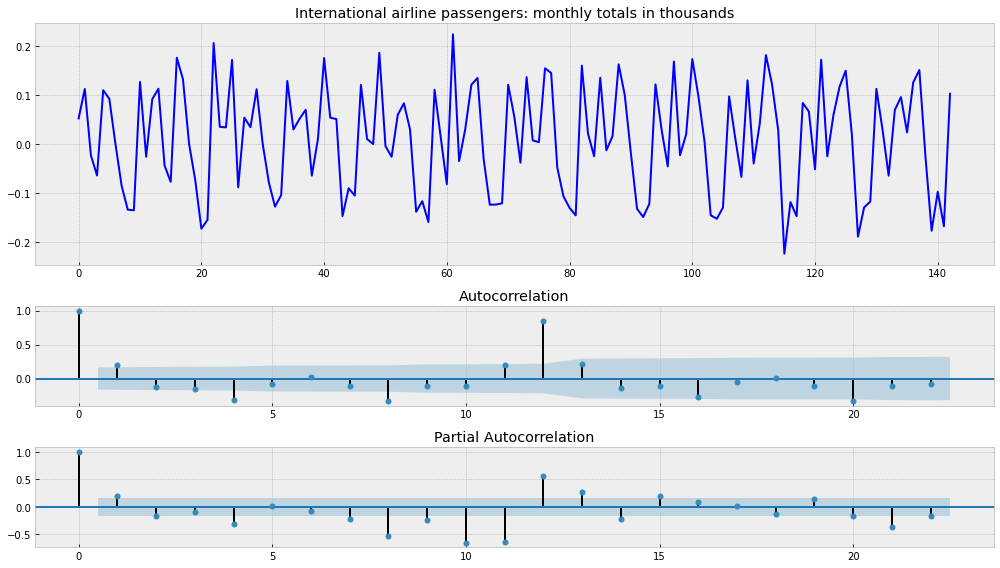

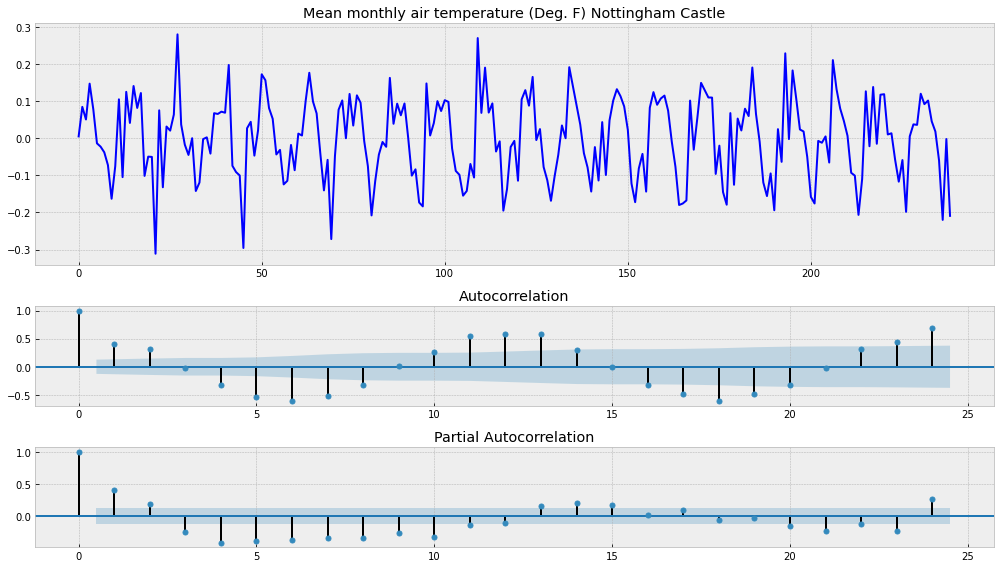

In [23]:
for key in all_series_MA.keys():
    all_series_MA_diff_1[key] = np.diff(all_series_MA[key], 1) #all_series[key][1:] - all_series[key][:-1]
    tsplot(all_series_MA_diff_1[key], key)

Осталась явная сезонность у первого ряда.

Повторим тест Дики-Фуллера для временного рядов после дифференцирования.

In [24]:
for key in all_series_MA_diff_1.keys():
    print('-----',key,':')
    test_stationarity(all_series_MA_diff_1[key], 'p-value')

----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.07
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
p-value 0.00


Второй временой ряд по-прежнему указывает на свою стационарность.  
А вот у первого ряда следует убрать сезонность (заодно **узнать интервал сезонности**, что немаловажно - и как всегда тест Дики-Фуллера).

In [25]:
two_series_MA_diff_1_season = copy.copy(all_series_MA_diff_1)

In [26]:
two_series_MA_diff_1_season.keys()

dict_keys(['International airline passengers: monthly totals in thousands', 'Mean monthly air temperature (Deg. F) Nottingham Castle'])

У обоих графиков есть в названии ключевое слово "monthly"!  
Уберём сезонность не только у нестационарного графика.  

In [27]:
for key in all_series_MA_diff_1.keys():
    two_series_MA_diff_1_season[key] = all_series_MA_diff_1[key][12:] - all_series_MA_diff_1[key][:-12]

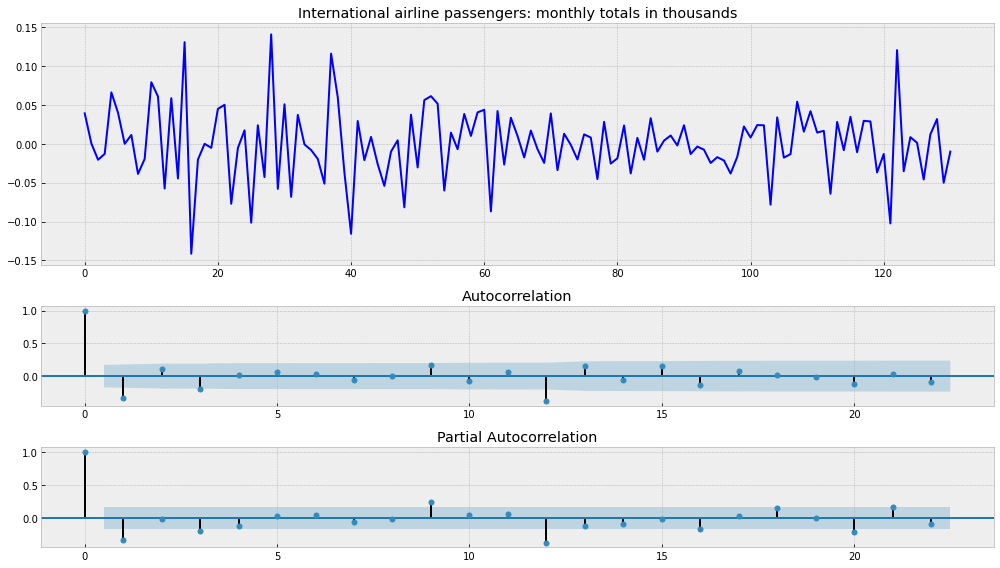

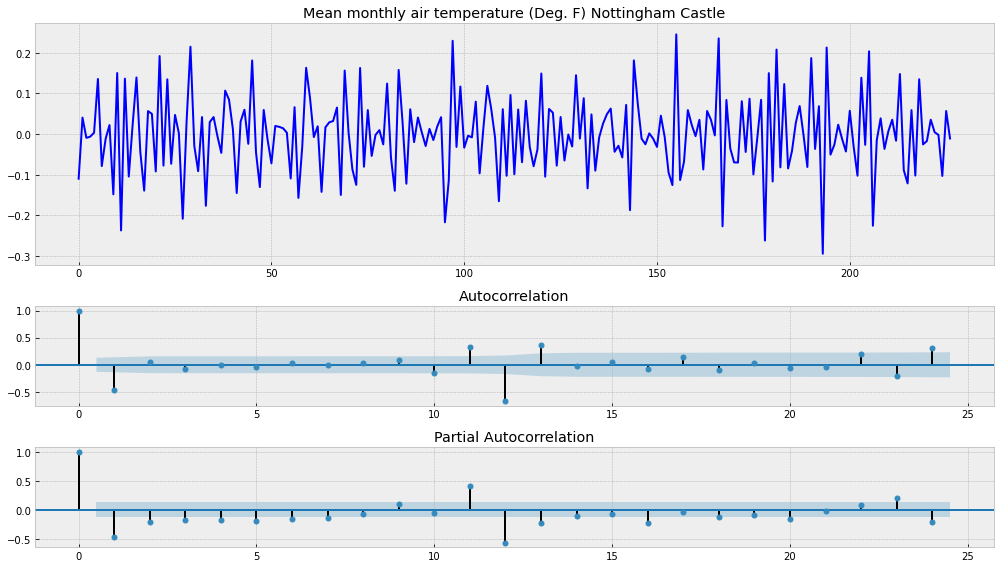

In [28]:
for key in two_series_MA_diff_1_season.keys():
    tsplot(two_series_MA_diff_1_season[key], key)

In [29]:
for key in two_series_MA_diff_1_season.keys():
    print('-----',key,':')
    test_stationarity(two_series_MA_diff_1_season[key], 'p-value')

----- International airline passengers: monthly totals in thousands :
Results of Dickey-Fuller Test:
p-value 0.00
----- Mean monthly air temperature (Deg. F) Nottingham Castle :
Results of Dickey-Fuller Test:
p-value 0.00


Наконец-то тест Дики-Фуллера показал, что первоначально нестационарный временной ряд стал стационарным после преобразования Бокса-Кокса, дифференцирования и убирания сезонности (заодно выяснили интервал сезонности, который действительно составляет 12 месяцев (и на словах и в зеркале, и на деле).  
Теперь приступим к прогнозированию на неизмененных временных рядах.

# Займёмся сглаживаниями и предсказаниями

In [30]:
print('Мы имеем дело c двумя временными рядами. Стационарным - ', ask[2], 'и нестационарным', ask[3],'.')

Мы имеем дело c двумя временными рядами. Стационарным -  International airline passengers: monthly totals in thousands и нестационарным Mean monthly air temperature (Deg. F) Nottingham Castle .


## Скользящее среднее

In [31]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

### Стационарный временной ряд

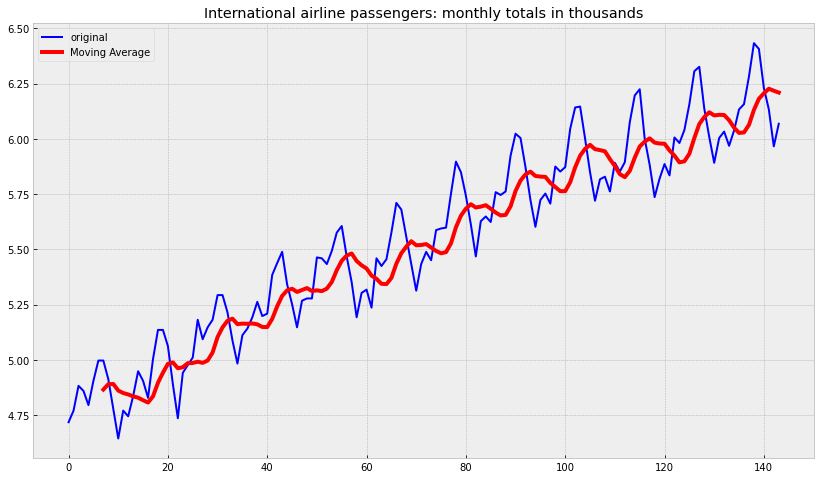

In [32]:
ser_MA_1 = moving_average(all_series_MA[ask[2]], 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series_MA[ask[2]], color='blue',label='original')
    plt.plot(ser_MA_1, color='red', linewidth='4', label='Moving Average')
    plt.title(ask[2])
    plt.legend()

### Нестационарный временной ряд

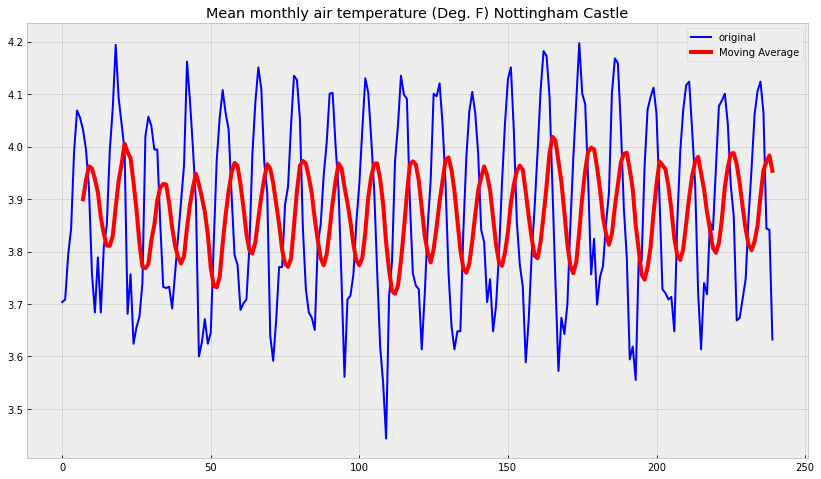

In [33]:
ser_MA_2 = moving_average(all_series_MA[ask[3]], 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series_MA[ask[3]], color='blue',label='original')
    plt.plot(ser_MA_2, color='red', linewidth='4', label='Moving Average')
    plt.title(ask[3])
    plt.legend()

## Взвешенное скользящее среднее

In [34]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

### Стационарный временной ряд

In [35]:
series_wma_1 = all_series_MA[ask[2]]
wma_fib_1 = weighted_moving_average(series_wma_1, 8, [1,1,2,3,5,8,13,21])
wma_seq_1 = weighted_moving_average(series_wma_1, 8, [1,2,3,4,5,6,7,8])
wma_pow_1 = weighted_moving_average(series_wma_1, 8, [1,2,4,8,16,32,64,128])

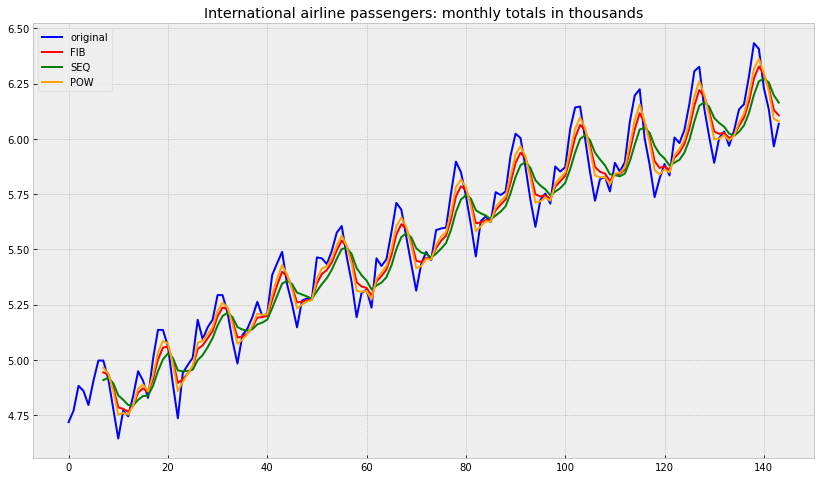

In [36]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_wma_1, color='blue',label='original')
    
    plt.plot(wma_fib_1, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq_1, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow_1, color='orange', linewidth='2', label='POW')
    plt.title(ask[2])
    plt.legend()

### Нестационарный временной ряд

In [37]:
series_wma_2 = all_series_MA[ask[3]]
wma_fib_2 = weighted_moving_average(series_wma_2, 8, [1,1,2,3,5,8,13,21])
wma_seq_2 = weighted_moving_average(series_wma_2, 8, [1,2,3,4,5,6,7,8])
wma_pow_2 = weighted_moving_average(series_wma_2, 8, [1,2,4,8,16,32,64,128])

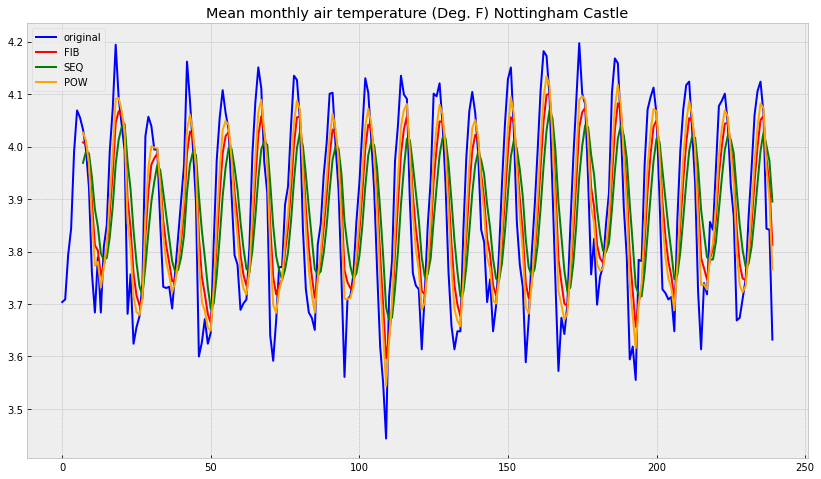

In [38]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_wma_2, color='blue',label='original')
    
    plt.plot(wma_fib_2, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq_2, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow_2, color='orange', linewidth='2', label='POW')
    plt.title(ask[3])
    plt.legend()

## Экспоненциальное сглаживание

Сравниваем со скользящим средним и взвешенным скользящим средним.

### Стационарный временной ряд

In [39]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

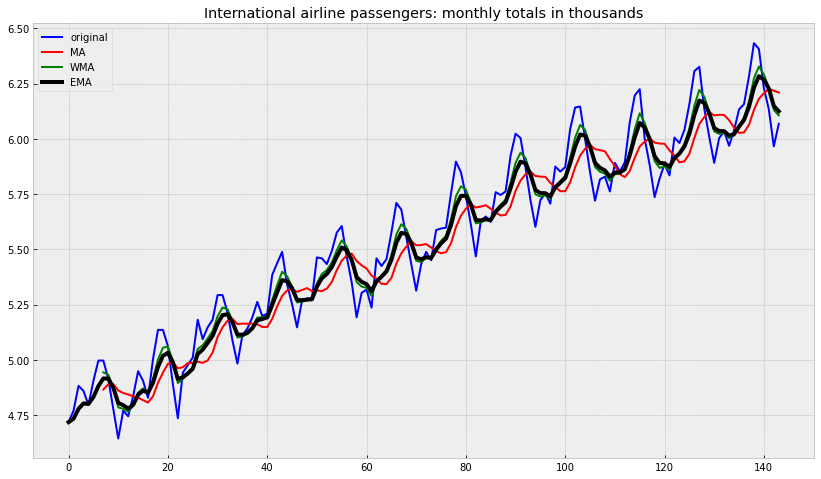

In [40]:
ema_1 = exponential_moving_average(all_series_MA[ask[2]], 0.3)
wma_1 = weighted_moving_average(all_series_MA[ask[2]], 8, [1,1,2,3,5,8,13,21])
ma_1 = moving_average(all_series_MA[ask[2]], 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series_MA[ask[2]], color='blue',label='original')
    plt.plot(ma_1, color='red', linewidth='2', label='MA')
    plt.plot(wma_1, color='green', linewidth='2', label='WMA')
    plt.plot(ema_1, color='black', linewidth='4', label='EMA')
    plt.title(ask[2])
    plt.legend()

### Нестационарный временной ряд

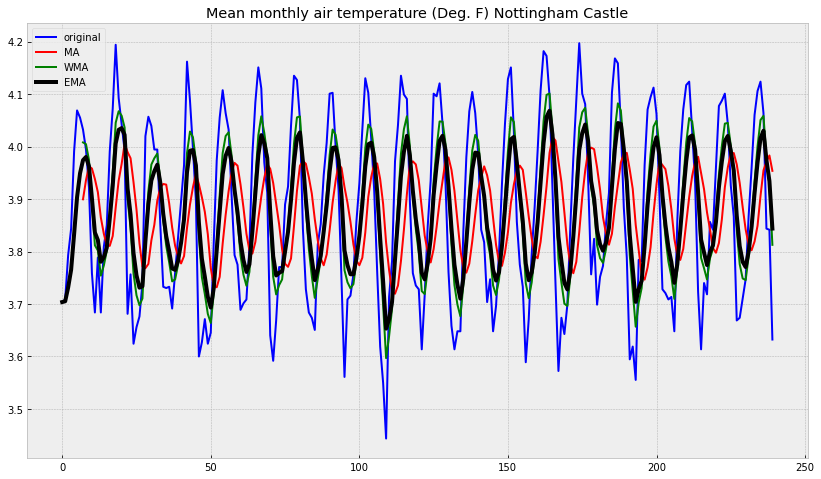

In [41]:
ema_2 = exponential_moving_average(all_series_MA[ask[3]], 0.3)
wma_2 = weighted_moving_average(all_series_MA[ask[3]], 8, [1,1,2,3,5,8,13,21])
ma_2 = moving_average(all_series_MA[ask[3]], 8)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(all_series_MA[ask[3]], color='blue',label='original')
    plt.plot(ma_2, color='red', linewidth='2', label='MA')
    plt.plot(wma_2, color='green', linewidth='2', label='WMA')
    plt.plot(ema_2, color='black', linewidth='4', label='EMA')
    plt.title(ask[3])
    plt.legend()

## Двойное экспоненциальное сглаживание

In [42]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [43]:
def plot_dema(alpha, beta, series):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

### Стационарный временной ряд

In [44]:
ask[2]

'International airline passengers: monthly totals in thousands'

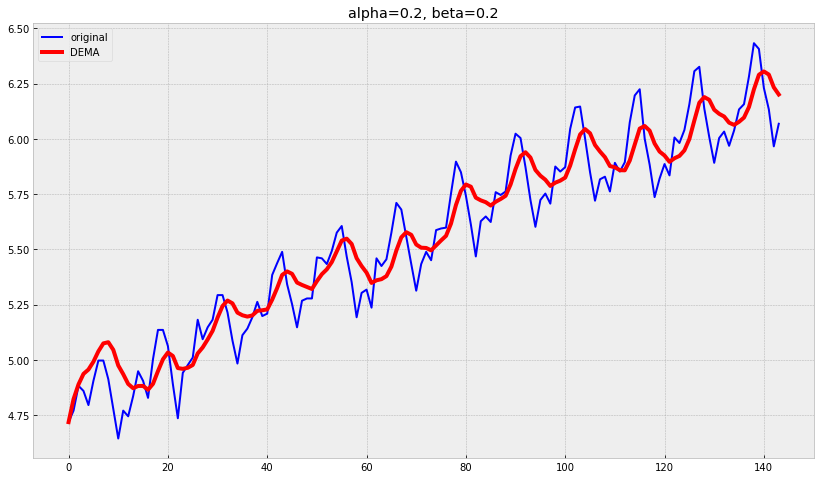

In [45]:
plot_dema(0.2, 0.2, all_series_MA[ask[2]])

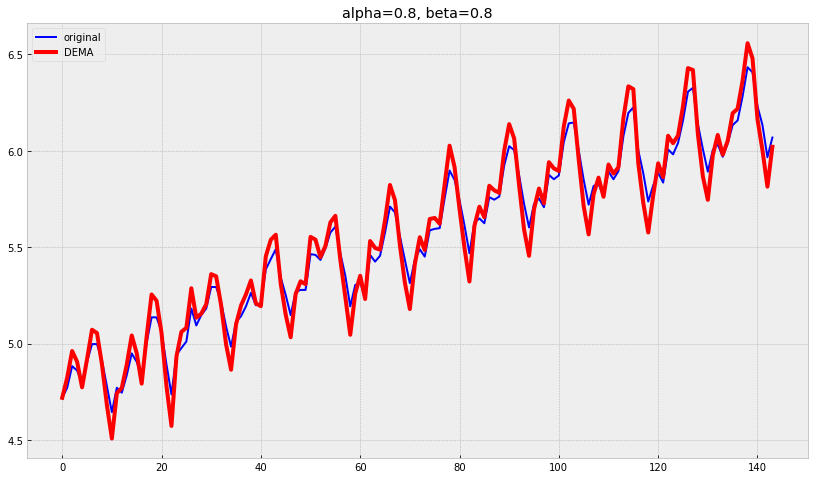

In [46]:
plot_dema(0.8, 0.8, all_series_MA[ask[2]])

### Нестационарный временной ряд

In [47]:
ask[3]

'Mean monthly air temperature (Deg. F) Nottingham Castle'

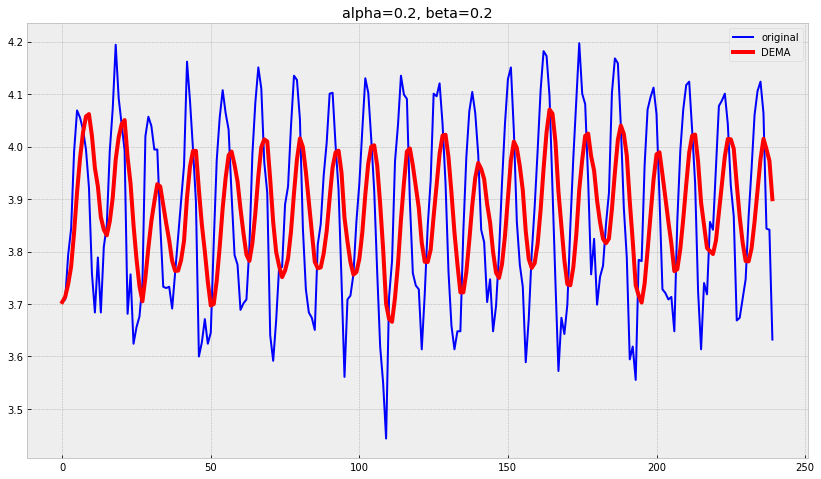

In [48]:
plot_dema(0.2, 0.2, all_series_MA[ask[3]])

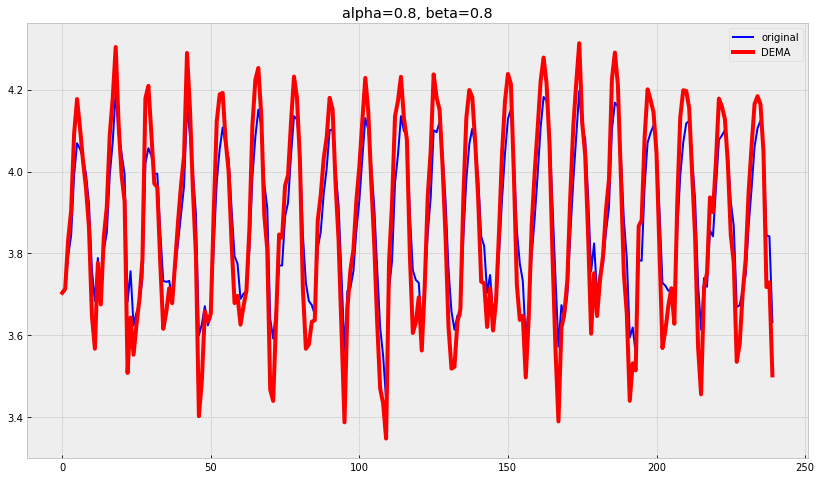

In [49]:
plot_dema(0.8, 0.8, all_series_MA[ask[3]])

#### Спрогнозируем данные на основе двойного экспоненциального сглаживания.

Количество предсказаний возьмём n_preds = 8.

In [50]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

---

### |Стационарный временной ряд

In [51]:
#ask2 = all_series_MA[ask[2]]
ask2 = airlines_passengers["Count"]

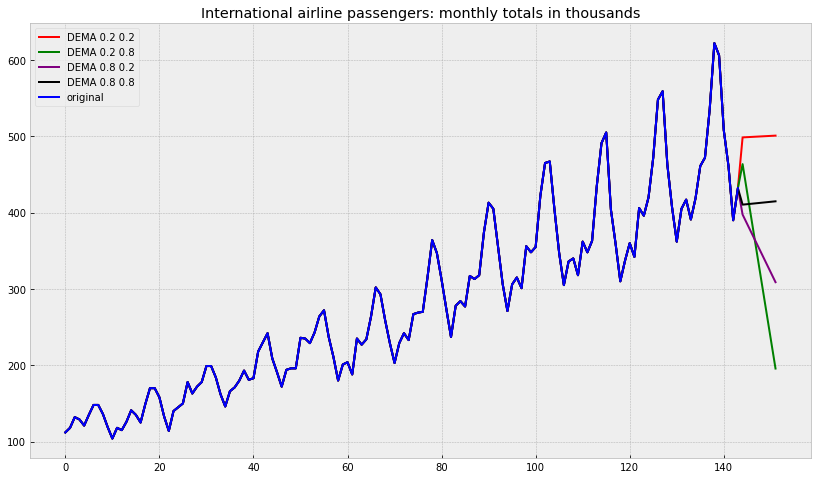

In [52]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(ask2, alphas[i], bettas[i], 8)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(ask2, color='blue',label='original')
    plt.title(ask[2])                       
    plt.legend()

---

### Нестационарный временной ряд

In [53]:
#ask3 = all_series_MA[ask[3]]
ask3 = mean_monthly_temp["Deg"]

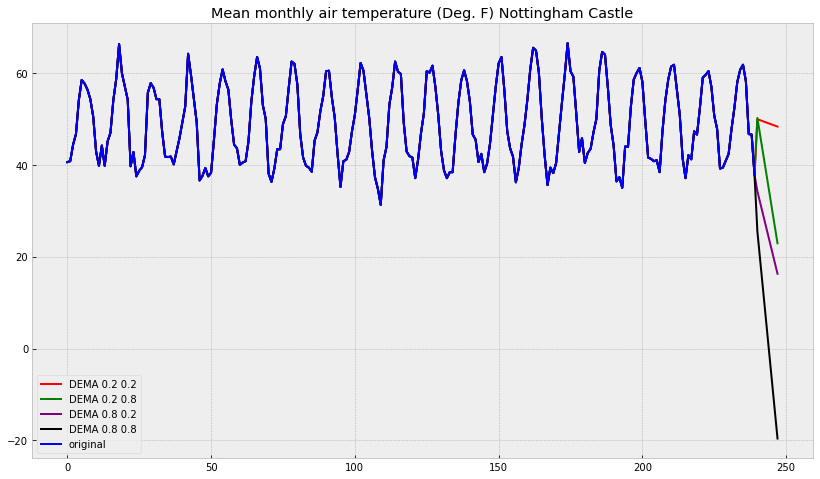

In [54]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(ask3, alphas[i], bettas[i], 8)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(ask3, color='blue',label='original')
    plt.title(ask[3])                       
    plt.legend()

## Хольт-Винтерс

In [55]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [56]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [57]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

### Стационарный временной ряд

In [58]:
ask[2]

'International airline passengers: monthly totals in thousands'

In [59]:
def plot_tema_st(alpha, beta, gamma, ser=ask2, ser_to_plot=ask2, n_preds=30):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

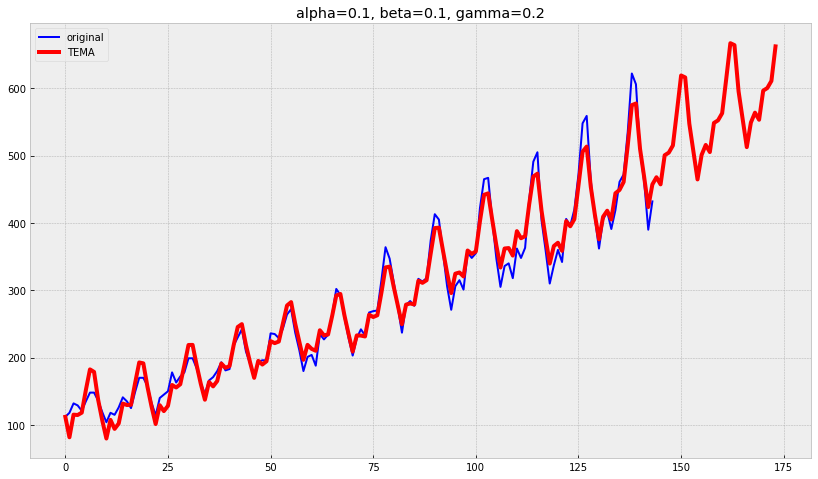

In [60]:
plot_tema_st(0.1, 0.1, 0.2)

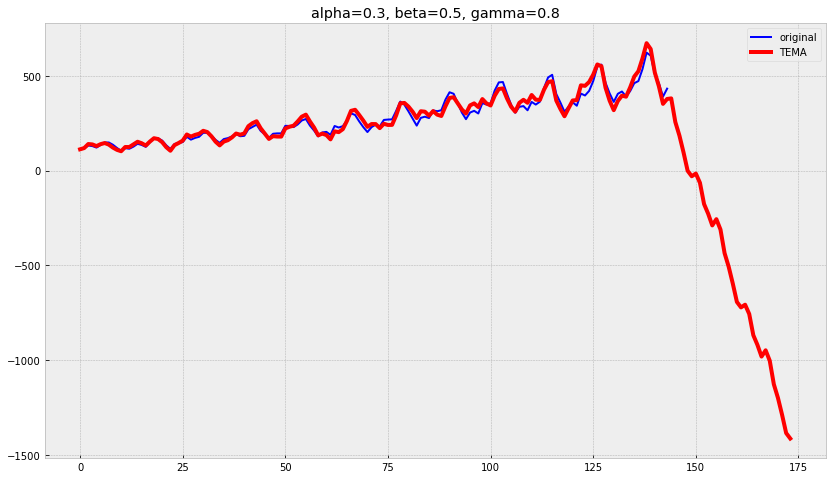

In [61]:
plot_tema_st(0.3, 0.5, 0.8)

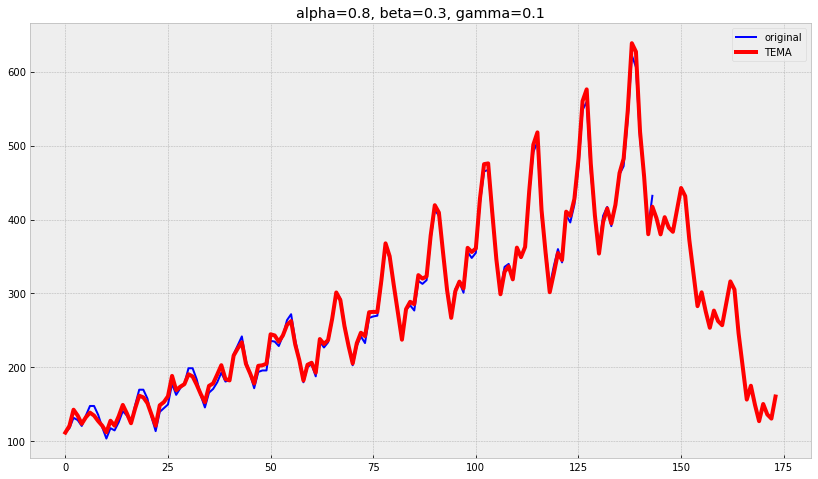

In [62]:
plot_tema_st(0.8, 0.3, 0.1)

### Нестационарный временной ряд

In [63]:
ask[3]

'Mean monthly air temperature (Deg. F) Nottingham Castle'

In [64]:
def plot_tema_nost(alpha, beta, gamma, ser=ask3, ser_to_plot=ask3, n_preds=30):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

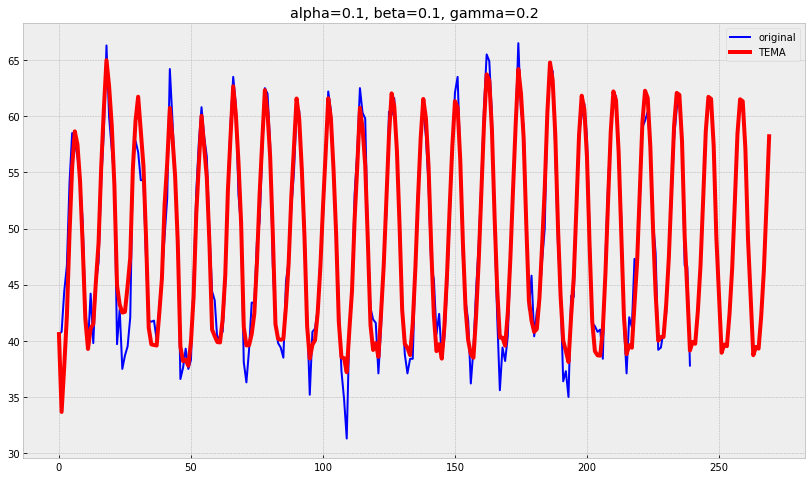

In [65]:
plot_tema_nost(0.1, 0.1, 0.2)

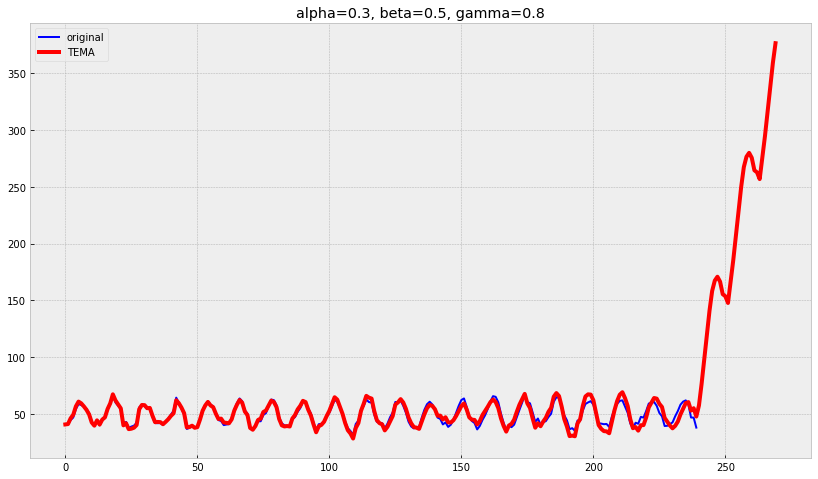

In [66]:
plot_tema_nost(0.3, 0.5, 0.8)

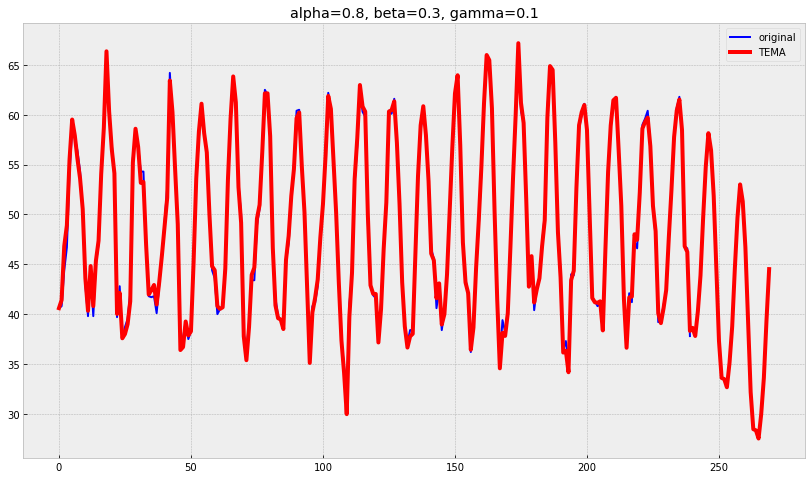

In [67]:
plot_tema_nost(0.8, 0.3, 0.1)

---

Везде и всюду проблемы с поиском параметров. Подберём параметры для Хольт-Винтерса.

# Подбор параметров

In [68]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [69]:
series_st = airlines_passengers["Count"]
series_nost = mean_monthly_temp["Deg"]

In [70]:
len(series_st), len(series_nost)

(144, 240)

In [71]:
train_st, test_st, val_st = series_st[:129], series_st[129:139], series_st[139:]
train_nost, test_nost, val_nost = series_nost[:225], series_nost[225:235], series_nost[235:]

#train_st, test_st, val_st = series_st[:134], series_st[134:144], series_st[144:]
#train_nost, test_nost, val_nost = series_nost[:230], series_nost[230:240], series_nost[240:]

### Стационарный ряд

In [72]:
def mse_st(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train_st, 12, alpha, beta, gamma, len(test_st))
    predictions = result[-len(test_st):]
    error = mean_squared_error(predictions, test_st)
    return error

In [73]:
opt = minimize(mse_st, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [74]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 1550.218551748109
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00256932, 0.0005457 , 0.06264145])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 64
      nit: 14
   status: 0
  success: True
        x: array([0.9938687 , 0.07207688, 0.99999729])


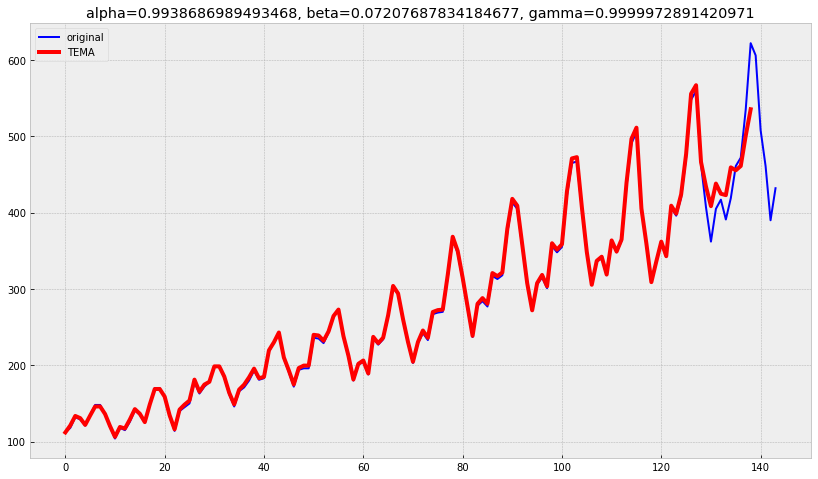

In [75]:
plot_tema_st(alpha_opt, beta_opt, gamma_opt, ser=train_st, ser_to_plot=series_st, n_preds=len(test_st))

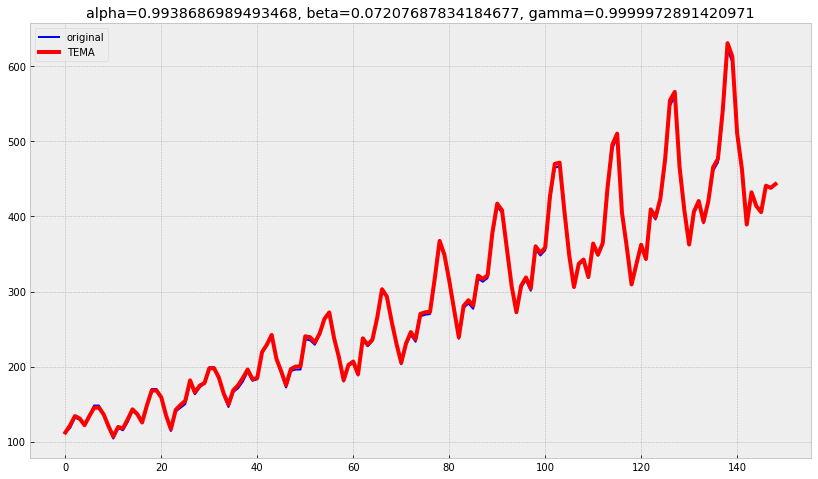

In [76]:
plot_tema_st(alpha_opt, beta_opt, gamma_opt, ser=series_st, ser_to_plot=series_st, n_preds=len(val_st))

### Нестационарный ряд

In [77]:
def mse_nost(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train_nost, 12, alpha, beta, gamma, len(test_nost))
    predictions = result[-len(test_nost):]
    error = mean_squared_error(predictions, test_nost)
    return error

In [78]:
opt = minimize(mse_nost, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [79]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 3.173219419072705
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.28626015e-06,  5.06763437e+01, -4.53101556e-02])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 5
   status: 0
  success: True
        x: array([0.93169892, 0.        , 1.        ])


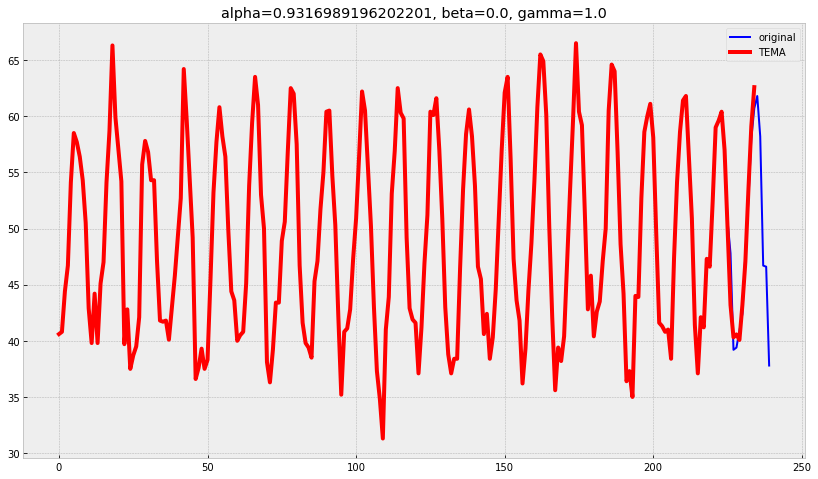

In [80]:
plot_tema_nost(alpha_opt, beta_opt, gamma_opt, ser=train_nost, ser_to_plot=series_nost[:240], n_preds=len(test_nost))

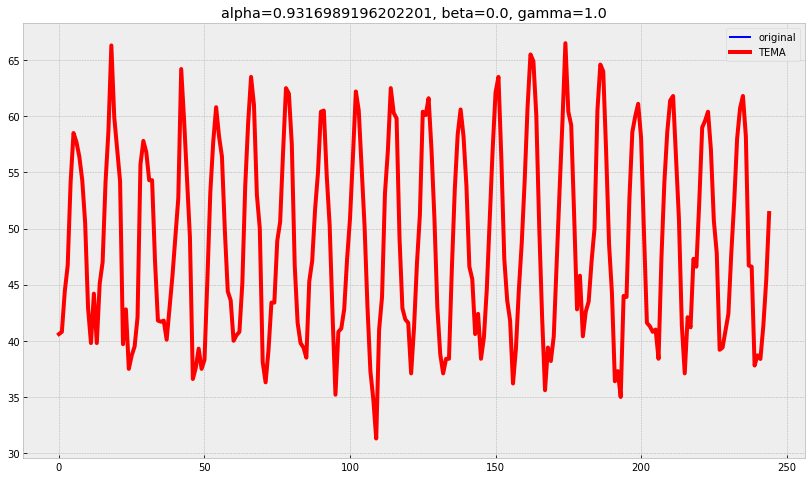

In [81]:
plot_tema_nost(alpha_opt, beta_opt, gamma_opt, ser=series_nost[:240], ser_to_plot=series_nost, n_preds=len(val_nost))

# Кросс-валидация

In [82]:
train_cv_st, val_cv_st = series_st[:130], series_st[130:]
train_cv_nost, val_cv_nost = series_nost[:225], series_nost[225:]

In [83]:
from sklearn.model_selection import TimeSeriesSplit

### Стационарный ряд

In [84]:
def mse_cross_val_st(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train_cv_st):
        train_split_ts = train_cv_st.iloc[train_split]
        test_split_ts = train_cv_st.iloc[test_split]

        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)

    return np.mean(np.array(errors))

In [85]:
opt = minimize(mse_cross_val_st, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [86]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 1109.3500065028375
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.13686838e-04,  8.41282599e-04,  5.83837277e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 30
   status: 0
  success: True
        x: array([0.74675953, 0.05943825, 0.        ])


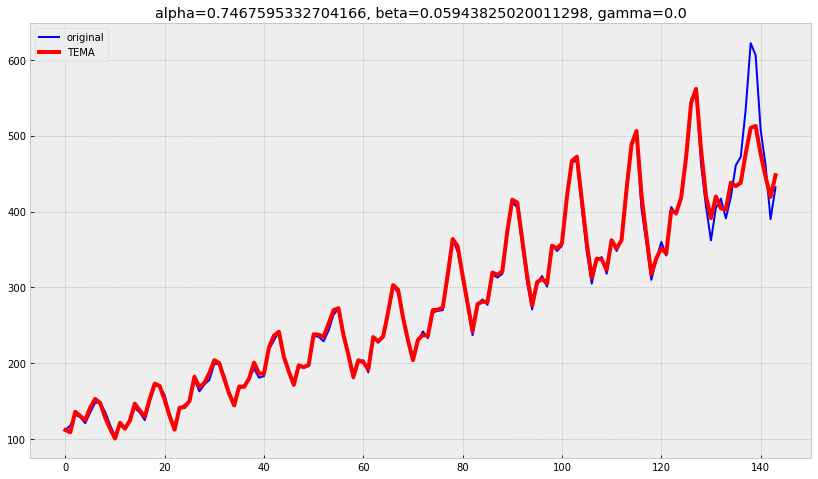

In [87]:
plot_tema_st(alpha_opt, beta_opt, gamma_opt, ser=train_cv_st, ser_to_plot=series_st, n_preds=len(val_cv_st))

### Нестационарный ряд

In [88]:
def mse_cross_val_nost(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train_cv_nost):
        train_split_ts = train_cv_nost.iloc[train_split]
        test_split_ts = train_cv_nost.iloc[test_split]

        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)

    return np.mean(np.array(errors))

In [89]:
opt = minimize(mse_cross_val_nost, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [90]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 6.753635060810606
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.88178420e-06,  2.35734466e+02, -9.75095560e-03])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 6
   status: 0
  success: True
        x: array([0.99293402, 0.        , 1.        ])


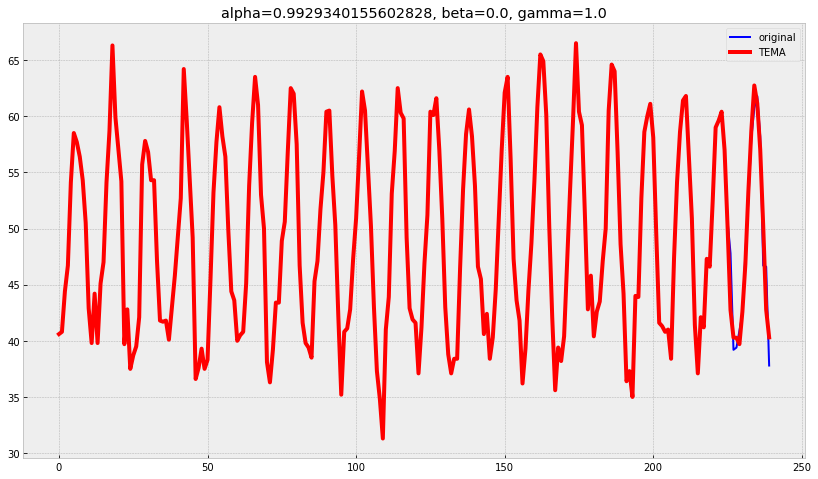

In [91]:
plot_tema_nost(alpha_opt, beta_opt, gamma_opt, ser=train_cv_nost, ser_to_plot=series_nost, n_preds=len(val_cv_nost))